In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
import seaborn
import pk_plot_library as pplib
pplib.imports()
def fill_mean(ax, data, kwargs):
    x = data[0]
    y = np.mean(np.array([data[1], data[2]]), axis = 0)
    kwargs['alpha'] = 1
    ax.plot(x, y, **kwargs)
    return
DRAFTPATH = '/Users/cosinga/code/hicolor_draft_two/figures/'
SAVEPATH = '/Users/cosinga/code/hcolor/fig_md_analysis/binth/'
WEBPATH = '/Users/cosinga/code/calvinosinga.github.io/papers/higal_cross/images/'


In [3]:

ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/8-12_pkdatasort.pkl', 'rb'))
ds.tickArgs(direction = 'in', right = True, top = True, labelsize = 14)
ds.legendArgs((-1,-1), frameon = False, loc = 'upper right', fontsize = 12)
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 14, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 14, ha = 'center', va = 'top')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.axisLabelArgs('both', {'fontsize':16})
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67, 50])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle'])
ds.displayAs('fieldname', ['hisubhalo', 'vn', 'hiptl', 'ptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle', 'Matter'])
ds.displayAs('snapshot', [99, 67, 50], ['z = 0.0', 'z = 0.5', 'z = 1'])
ds.displayAs('color', ['blue', 'red', 'resolved'], [r'HI $\times$ Blue', r'HI $\times$ Red', r'HI $\times$ Galaxies'])
ds.plotArgs('color', 'red', {'color':'red'})
ds.plotArgs('color', 'blue', {'color':'blue'})
ds.plotArgs('color', 'resolved', {'color':'gray'})
ds.plotArgs('space', 'real', {'color':'green'})
ds.plotArgs('space', 'redshift', {'color':'orange'})
lowbin = r'10$^7 \leq$ M$_{\mathrm{HI}}$/M$_\odot$ $<$ 10$^8$'
midbin =r'10$^8 \leq$ M$_{\mathrm{HI}}$/M$_\odot$ $<$ 10$^9$'
highbin = r'10$^9 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
bins = ['low-bin', 'mid-bin', 'high-bin']
threshs = ['low-threshold', 'mid-threshold', 'high-threshold']
ds.displayAs('HI_res', bins, [lowbin, midbin, highbin])
ds.setOrder('HI_res', bins + threshs + ['diemer'])
colors = seaborn.color_palette('copper', len(bins) + 1)
colors.reverse()
for i in range(len(bins)):
    ds.plotArgs('HI_res', bins[i], {'color':colors[i]})
    ds.plotArgs('HI_res', threshs[i], {'color':colors[i]})
ds.plotArgs('HI_res', 'diemer', {'color':colors[-1], 'label':'No Cut'})

lowth = r'10$^7 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
midth =r'10$^8 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
highth = r'10$^9 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
ds.displayAs('HI_res', threshs, [lowth, midth, highth])


colors = seaborn.color_palette('viridis', len(bins) + 1)
colors.reverse()
for i in range(len(bins)):
    ds.plotArgs('gal_res', bins[i], {'color':colors[i]})
    ds.plotArgs('gal_res', threshs[i], {'color':colors[i]})
ds.plotArgs('gal_res', 'diemer', {'color':colors[-1], 'label':'No Cut'})

lowth = r'10$^9 \leq$ M$_{\star}$/M$_\odot$'
midth =r'10$^{10} \leq$ M$_{\star}$/M$_\odot$'
highth = r'10$^{11} \leq$ M$_{\star}$/M$_\odot$'
ds.displayAs('gal_res', threshs, [lowth, midth, highth])
lowbin = r'2 $\times$ 10$^8 \leq$ M$_{\star}$/M$_\odot$ $<$ 10$^9$'
midbin =r'10$^9 \leq$ M$_{\star}$/M$_\odot$ $<$ 10$^{10}$'
highbin = r'10$^{10} \leq$ M$_{\star}$/M$_\odot$ $<$ 10$^{11}$'
ds.displayAs('gal_res', bins, [lowbin, midbin, highbin])
ds.setOrder('gal_res', bins + threshs + ['diemer'])

ds.displayAs('censat', ['centrals', 'satellites', 'both', 'centrals_both', 'satellites_both', 'both_satellites', 'both_centrals'],
            ['Central Galaxies', 'Satellite Galaxies', 'Both', 'HI in Centrals', 'HI in Satellites', 'Satellite Galaxies', 'Central Galaxies'])

# Paper figure

The row values for snapshot: [99]
The column values for color: ['blue', 'red', 'resolved']


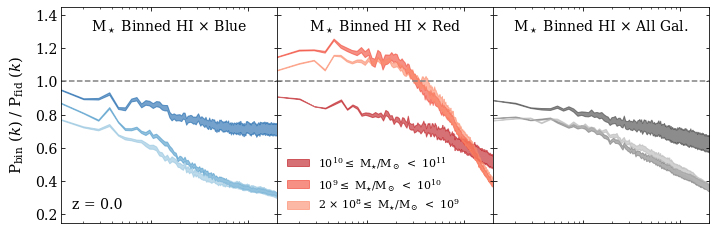

In [21]:
ip = {'is_auto':False, 'censat':['no key found', 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial','galbt'], 'gal_res':bins + ['diemer'], 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found', 'simname':'tng100', 'snapshot' : 99}

afg = ds.figrid('gal_res', 'snapshot', 'color', ip)
afg.autoNorm({'gal_res':'diemer'}, ['model'])
afg.gspecArgs(hspace = 0.05, yborder = [0, 0.05], wspace = 0)
afg.colLabels(['M$_\\star$ Binned HI $\\times$ Blue', 'M$_\\star$ Binned HI $\\times$ Red', 'M$_\\star$ Binned HI $\\times$ All Gal.'], pos = [0.5, 0.95])
afg.colLabelArgs(ha = 'center', va = 'top')
afg.legendArgs(loc = 'lower left', fontsize = 11, slc = (0,1))
afg.plotOrder(['diemer', 'high-bin', 'mid-bin', 'low-bin'])
afg.setDefaultTicksParams()
# afg.axisArgs(ylim = (1, 1e4))
afg.axisArgs(yscale = 'linear', ylim = (0.15, 1.45))
gal_res = ip['gal_res'][:3]

cmaps = {}
cmaps['blue'] = seaborn.color_palette('Blues', len(gal_res) + 1)
cmaps['red'] = seaborn.color_palette('Reds', len(gal_res)+ 1)
cmaps['resolved'] = seaborn.color_palette('Greys', len(gal_res) + 1)
for c in ip['color']:
    for b in range(len(gal_res)):
        col = cmaps[c][b+1]
        afg.plotArgs({'color':c, 'gal_res':gal_res[b]}, {'color':col})
afg.tickArgs(labelbottom = False)
# afg.plotArgs({'gal_res':'diemer'}, linestyle = '--', color = 'black', label = 'No Cut')

afg.autoFill(alpha = 0.6)

afg.setFunc({'figrid_process':'fill', 'gal_res':'diemer'}, fill_mean)

afg.setYLabel(pplib.pkrat('bin', 'fid'), fontsize = 15)
afg.plotOnes()
# afg.setXLabel(pplib.wnum())
afg.plot()

The row values for : ['no key found']
The column values for color: ['blue', 'red', 'resolved']


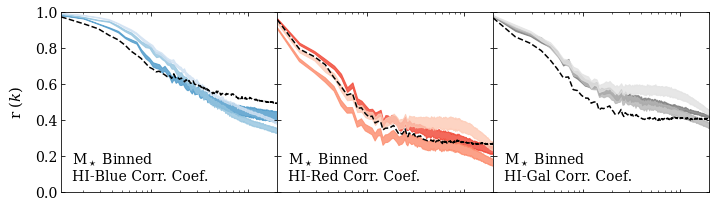

In [22]:
ip = {'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['galbt', 'fiducial'], 'gal_res':bins + ['diemer'], 'color':['blue', 'red', 'resolved'], 'post_process':'corr_coef', 'HI_fieldname':'hisubhalo', 'snapshot':[99],
     'simname':'tng100'}
bfg = ds.figrid('gal_res', '', 'color', ip)
# bfg.autoNorm({'gal_res':'diemer'}, must_match =['model', 'color'])
gal_res = ip['gal_res'][:3]
cmaps = {}
cmaps['blue'] = seaborn.color_palette('Blues', len(gal_res) + 1)
cmaps['red'] = seaborn.color_palette('Reds', len(gal_res)+ 1)
cmaps['resolved'] = seaborn.color_palette('Greys', len(gal_res) + 1)
bfg.legendArgs(rm_legend = True)

loopbins = bins + ['diemer']
for c in ip['color']:
    bfg.setCmap(cmaps[c][:3] + [pplib.rgba('black', .6)], loopbins, {'color':c})
bfg.setYLabel("r ($k$)")
bfg.colLabels(['M$_\\star$ Binned\nHI-Blue Corr. Coef.', 'M$_\\star$ Binned\nHI-Red Corr. Coef.', 'M$_\\star$ Binned\nHI-Gal Corr. Coef.'], pos = [0.5, 0.95])

bfg.setDefaultTicksParams()
bfg.tickArgs(labelbottom = False)

bfg.colLabels(pos = (0.05, 0.05))
bfg.colLabelArgs(ha = 'left', va = 'bottom')
bfg.gspecArgs(wspace = 0, hspace = 0.1, yborder = [0, 0.25])
# bfg.legendArgs(loc = 'lower left', slc = (0, 2), fontsize = 11)
bfg.axisArgs(yscale = 'linear', ylim = (0, 1))
bfg.setPanelsize(3,2.5)

bfg.autoFill(alpha = 0.8)
bfg.setFunc({'figrid_process':'fill', 'gal_res':'diemer'}, fill_mean)
bfg.plotArgs({'figrid_process':'fill', 'gal_res':'diemer'}, label = 'No Cut', linestyle = '--')



rbins = copy.deepcopy(bins)
rbins.reverse()
bfg.plotOrder(['diemer'] + rbins)
bfg.plot()


The row values for snapshot: [99]
The column values for color: ['blue', 'red', 'resolved']


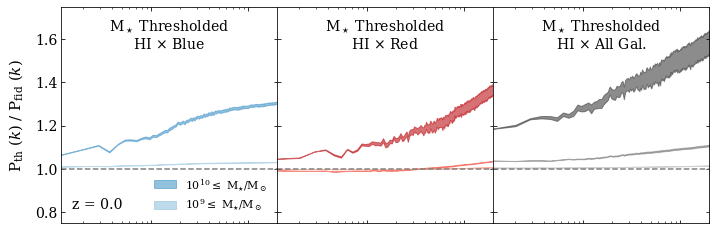

In [23]:
ip = {'is_auto':False, 'censat':['no key found', 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial','galbt'], 'gal_res':threshs + ['diemer'], 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found', 'simname':'tng100', 'snapshot' : 99}

tfg = ds.figrid('gal_res', 'snapshot', 'color', ip)
tfg.autoNorm({'gal_res':'diemer'}, ['model'])
tfg.gspecArgs(hspace = 0.05, yborder = [0, 0.05], wspace = 0)
tfg.colLabels(['M$_\\star$ Thresholded\nHI $\\times$ Blue', 'M$_\\star$ Thresholded\nHI $\\times$ Red', 'M$_\\star$ Thresholded\nHI $\\times$ All Gal.'], pos = [0.5, 0.95])
tfg.colLabelArgs(ha = 'center', va = 'top')
tfg.legendArgs(loc = 'lower right', fontsize = 11, slc = (0,0))
tfg.plotOrder(['diemer', 'high-bin', 'mid-bin', 'low-bin'])
tfg.setDefaultTicksParams()
# afg.axisArgs(ylim = (1, 1e4))
tfg.axisArgs(yscale = 'linear', ylim = (0.75, 1.75))
gal_res = ip['gal_res'][:3]

cmaps = {}
cmaps['blue'] = seaborn.color_palette('Blues', len(gal_res) + 1)
cmaps['red'] = seaborn.color_palette('Reds', len(gal_res)+ 1)
cmaps['resolved'] = seaborn.color_palette('Greys', len(gal_res) + 1)
for c in ip['color']:
    for b in range(len(gal_res)):
        col = cmaps[c][b+1]
        tfg.plotArgs({'color':c, 'gal_res':gal_res[b]}, {'color':col})
tfg.tickArgs(labelbottom = False)
# afg.plotArgs({'gal_res':'diemer'}, linestyle = '--', color = 'black', label = 'No Cut')
tfg.autoFill(alpha = 0.6)

tfg.setFunc({'figrid_process':'fill', 'gal_res':'diemer'}, fill_mean)
tfg.plotArgs({'gal_res':'high-threshold', 'figrid_process':'fill'}, slc = 'blue', visible = False, label = '_nolegend_')

gal_res.reverse()
tfg.plotOrder(gal_res)
tfg.setYLabel(pplib.pkrat('th', 'fid'), fontsize = 15)
tfg.plotOnes()
# afg.setXLabel(pplib.wnum())
tfg.plot()

The row values for : ['no key found']
The column values for color: ['blue', 'red', 'resolved']


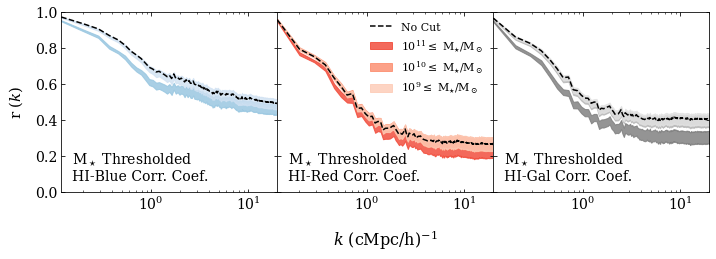

In [24]:
ip = {'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real', 'simname':'tng100',
     'grid_resolution':800, 'path':['galbt', 'fiducial'], 'gal_res':threshs + ['diemer'], 'color':['blue', 'red', 'resolved'], 'post_process':'corr_coef', 'HI_fieldname':'hisubhalo', 'snapshot':[99]}
crfg = ds.figrid('gal_res', '', 'color', ip)
gal_res = ip['gal_res'][:3]
cmaps = {}
cmaps['blue'] = seaborn.color_palette('Blues', len(gal_res) + 1)
cmaps['red'] = seaborn.color_palette('Reds', len(gal_res)+ 1)
cmaps['resolved'] = seaborn.color_palette('Greys', len(gal_res) + 1)

loopth = threshs + ['diemer']
for c in ip['color']:
    crfg.setCmap(cmaps[c][:3] + [pplib.rgba('black', .6)], loopth, {'color':c})
# fg.setYLabel(ccrat('Thresh', 'Fid.'))
crfg.setXLabel(pplib.wnum())
crfg.setDefaultTicksParams()
crfg.setPanelsize(3, 2.5)
crfg.gspecArgs(wspace = 0, hspace = 0.1, yborder = [0, 0.33])
crfg.setYLabel("r ($k$)")
crfg.colLabels(['M$_\\star$ Thresholded\nHI-Blue Corr. Coef.', 'M$_\\star$ Thresholded\nHI-Red Corr. Coef.', 'M$_\\star$ Thresholded\nHI-Gal Corr. Coef.'], pos = [0.5, 0.95])
crfg.colLabels(pos = (0.05, 0.05))
crfg.colLabelArgs(ha = 'left', va = 'bottom')
crfg.legendArgs(loc = 'upper right', slc = (0, 1), fontsize = 11)
crfg.axisArgs(yscale = 'linear', ylim = (0, 1))
crfg.autoFill(alpha = 0.8)
crfg.plotArgs({'gal_res':'high-threshold', 'figrid_process':'fill'}, slc = 'blue', visible = False, label = '_nolegend_')

crfg.setFunc({'figrid_process':'fill', 'gal_res':'diemer'}, fill_mean)
crfg.plotArgs({'figrid_process':'fill', 'gal_res':'diemer'}, linestyle= '--', label = 'No Cut')
rbins = copy.deepcopy(threshs)
rbins.reverse()
# crfg.annotatePanel('M$_\\star$ Thresholds\nCorr. Coef. Ratios', [0.95, 0.05], (0, 2), color = 'purple', 
#                 ha = 'right', va = 'bottom', fontsize = 16)
crfg.plotOrder(['diemer']+rbins)
crfg.plot()

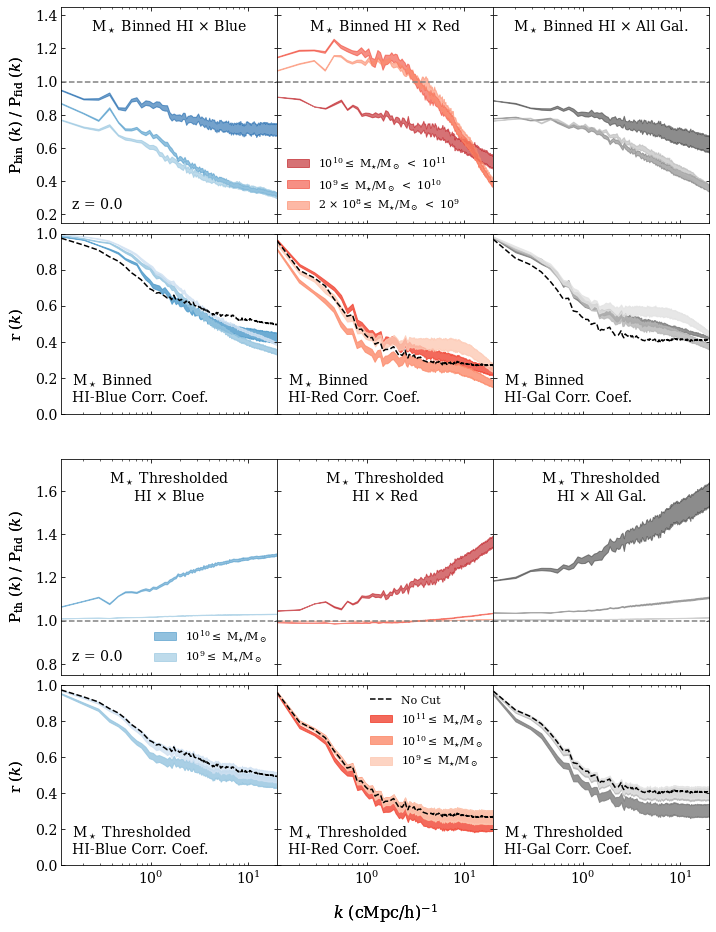

In [25]:
figarr = np.empty((4, 1), dtype = object)
figarr[:, 0] = [afg, bfg, tfg, crfg]
fig = afg.combine(figarr)
fig.savefig(DRAFTPATH + 'stmassbinth_small_with_cross_ratios.pdf', dpi = 150, bbox_inches = 'tight')
fig.savefig(SAVEPATH+'stmassbinth_small_with_cross_ratios.png', dpi = 150, bbox_inches = 'tight')

The row values for snapshot: [67]
The column values for color: ['blue', 'red', 'resolved']


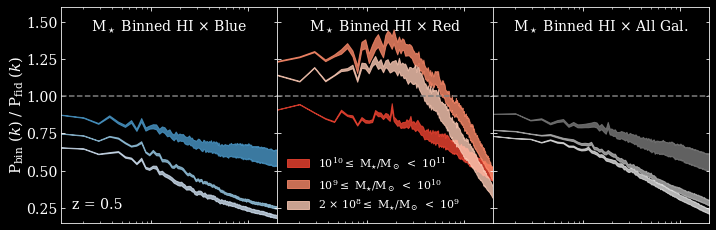

In [23]:
ip = {'is_auto':False, 'censat':['no key found', 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial','galbt'], 'gal_res':bins + ['diemer'], 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.55', 'None'], 'post_process':'no key found', 'simname':'tng100', 'snapshot' : 67}

afg = ds.figrid('gal_res', 'snapshot', 'color', ip)
afg.autoNorm({'gal_res':'diemer'}, ['model'])
afg.gspecArgs(hspace = 0.05, yborder = [0, 0.05], wspace = 0)
afg.colLabels(['M$_\\star$ Binned HI $\\times$ Blue', 'M$_\\star$ Binned HI $\\times$ Red', 'M$_\\star$ Binned HI $\\times$ All Gal.'], pos = [0.5, 0.95])
afg.colLabelArgs(ha = 'center', va = 'top')
afg.legendArgs(loc = 'lower left', fontsize = 11, slc = (0,1))
afg.plotOrder(['diemer', 'high-bin', 'mid-bin', 'low-bin'])
afg.setDefaultTicksParams()
# afg.axisArgs(ylim = (1, 1e4))
afg.axisArgs(yscale = 'linear', ylim = (0.15, 1.6))
gal_res = ip['gal_res'][:3]

cmaps = {}
cmaps['blue'] = seaborn.color_palette('Blues', len(gal_res) + 1)
cmaps['red'] = seaborn.color_palette('Reds', len(gal_res)+ 1)
cmaps['resolved'] = seaborn.color_palette('Greys', len(gal_res) + 1)
for c in ip['color']:
    for b in range(len(gal_res)):
        col = cmaps[c][b]
        afg.plotArgs({'color':c, 'gal_res':gal_res[b]}, {'color':col})
afg.tickArgs(labelbottom = False)
# afg.plotArgs({'gal_res':'diemer'}, linestyle = '--', color = 'black', label = 'No Cut')

afg.autoFill(alpha = 0.8)

afg.setFunc({'figrid_process':'fill', 'gal_res':'diemer'}, fill_mean)

afg.setYLabel(pplib.pkrat('bin', 'fid'), fontsize = 15)
afg.plotOnes()
# afg.setXLabel(pplib.wnum())
pplib.darkmode(afg)
afg.plot()

The row values for : ['no key found']
The column values for color: ['blue', 'red', 'resolved']


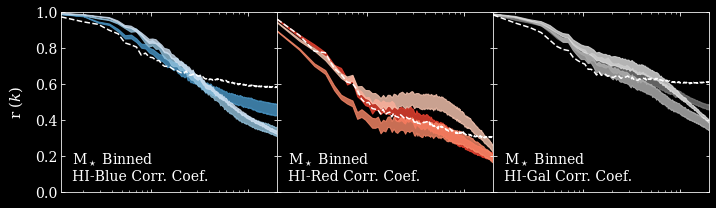

In [24]:
ip = {'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['galbt', 'fiducial'], 'gal_res':bins + ['diemer'], 'color':['blue', 'red', 'resolved'], 'post_process':'corr_coef', 'HI_fieldname':'hisubhalo', 'snapshot':[67],
     'simname':'tng100'}
bfg = ds.figrid('gal_res', '', 'color', ip)
# bfg.autoNorm({'gal_res':'diemer'}, must_match =['model', 'color'])
gal_res = ip['gal_res'][:3]
cmaps = {}
cmaps['blue'] = seaborn.color_palette('Blues', len(gal_res) + 1)
cmaps['red'] = seaborn.color_palette('Reds', len(gal_res)+ 1)
cmaps['resolved'] = seaborn.color_palette('Greys', len(gal_res) + 1)


loopbins = bins + ['diemer']
for c in ip['color']:
    bfg.setCmap(cmaps[c][:3] + [pplib.rgba('black', .6)], loopbins, {'color':c})
bfg.setYLabel("r ($k$)")
bfg.colLabels(['M$_\\star$ Binned\nHI-Blue Corr. Coef.', 'M$_\\star$ Binned\nHI-Red Corr. Coef.', 'M$_\\star$ Binned\nHI-Gal Corr. Coef.'], pos = [0.5, 0.95])

bfg.setDefaultTicksParams()
bfg.tickArgs(labelbottom = False)

bfg.colLabels(pos = (0.05, 0.05))
bfg.colLabelArgs(ha = 'left', va = 'bottom')
bfg.gspecArgs(wspace = 0, hspace = 0.1, yborder = [0, 0.25])
# bfg.legendArgs(loc = 'lower left', slc = (0, 2), fontsize = 11)
bfg.axisArgs(yscale = 'linear', ylim = (0, 1))
bfg.setPanelsize(3,2.5)

bfg.autoFill(alpha = 0.8)
bfg.setFunc({'figrid_process':'fill', 'gal_res':'diemer'}, fill_mean)
bfg.plotArgs({'figrid_process':'fill', 'gal_res':'diemer'}, label = 'No Cut', linestyle = '--', color = 'white')



rbins = copy.deepcopy(bins)
rbins.reverse()
bfg.plotOrder(['diemer'] + rbins)
pplib.darkmode(bfg)
bfg.legendArgs(rm_legend = True)
bfg.plot()


The row values for snapshot: [67]
The column values for color: ['blue', 'red', 'resolved']


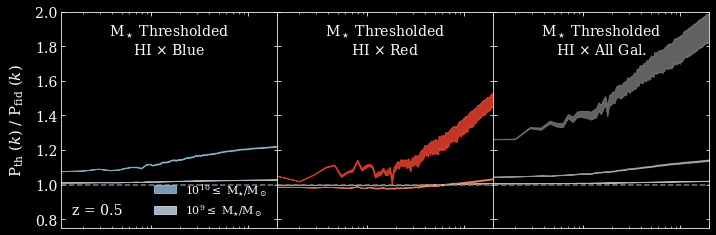

In [25]:
ip = {'is_auto':False, 'censat':['no key found', 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial','galbt'], 'gal_res':threshs + ['diemer'], 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.55', 'None'], 'post_process':'no key found', 'simname':'tng100', 'snapshot' : 67}

tfg = ds.figrid('gal_res', 'snapshot', 'color', ip)
tfg.autoNorm({'gal_res':'diemer'}, ['model'])
tfg.gspecArgs(hspace = 0.05, yborder = [0, 0.05], wspace = 0)
tfg.colLabels(['M$_\\star$ Thresholded\nHI $\\times$ Blue', 'M$_\\star$ Thresholded\nHI $\\times$ Red', 'M$_\\star$ Thresholded\nHI $\\times$ All Gal.'], pos = [0.5, 0.95])
tfg.colLabelArgs(ha = 'center', va = 'top')
tfg.legendArgs(loc = 'lower right', fontsize = 11, slc = (0,0))
tfg.plotOrder(['diemer', 'high-bin', 'mid-bin', 'low-bin'])
tfg.setDefaultTicksParams()
# afg.axisArgs(ylim = (1, 1e4))
tfg.axisArgs(yscale = 'linear', ylim = (0.75, 2))
gal_res = ip['gal_res'][:3]

cmaps = {}
cmaps['blue'] = seaborn.color_palette('Blues', len(gal_res) + 1)
cmaps['red'] = seaborn.color_palette('Reds', len(gal_res)+ 1)
cmaps['resolved'] = seaborn.color_palette('Greys', len(gal_res) + 1)
for c in ip['color']:
    for b in range(len(gal_res)):
        col = cmaps[c][b]
        tfg.plotArgs({'color':c, 'gal_res':gal_res[b]}, {'color':col})
tfg.tickArgs(labelbottom = False)
# afg.plotArgs({'gal_res':'diemer'}, linestyle = '--', color = 'black', label = 'No Cut')
tfg.autoFill(alpha = 0.8)

tfg.setFunc({'figrid_process':'fill', 'gal_res':'diemer'}, fill_mean)
tfg.plotArgs({'gal_res':'high-threshold', 'figrid_process':'fill'}, slc = 'blue', visible = False, label = '_nolegend_')

gal_res.reverse()
tfg.plotOrder(gal_res)
tfg.setYLabel(pplib.pkrat('th', 'fid'), fontsize = 15)
pplib.darkmode(tfg)
tfg.plotOnes()
# afg.setXLabel(pplib.wnum())
tfg.plot()

The row values for : ['no key found']
The column values for color: ['blue', 'red', 'resolved']


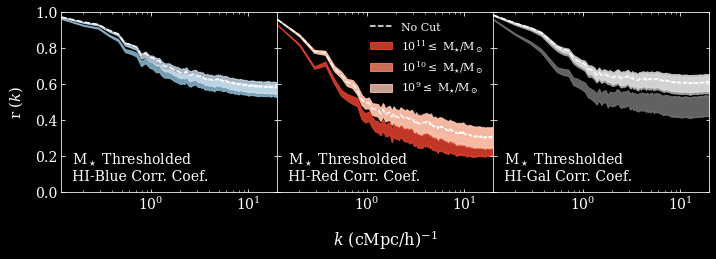

In [26]:
ip = {'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real', 'simname':'tng100',
     'grid_resolution':800, 'path':['galbt', 'fiducial'], 'gal_res':threshs + ['diemer'], 'color':['blue', 'red', 'resolved'], 'post_process':'corr_coef', 'HI_fieldname':'hisubhalo', 'snapshot':[67]}
crfg = ds.figrid('gal_res', '', 'color', ip)
gal_res = ip['gal_res'][:3]
cmaps = {}
cmaps['blue'] = seaborn.color_palette('Blues', len(gal_res) + 1)
cmaps['red'] = seaborn.color_palette('Reds', len(gal_res)+ 1)
cmaps['resolved'] = seaborn.color_palette('Greys', len(gal_res) + 1)

loopth = threshs + ['diemer']
for c in ip['color']:
    crfg.setCmap(cmaps[c][:3] + [pplib.rgba('black', .6)], loopth, {'color':c})
# fg.setYLabel(ccrat('Thresh', 'Fid.'))
crfg.setXLabel(pplib.wnum())
crfg.setDefaultTicksParams()
crfg.setPanelsize(3, 2.5)
crfg.gspecArgs(wspace = 0, hspace = 0.1, yborder = [0, 0.33])
crfg.setYLabel("r ($k$)")
crfg.colLabels(['M$_\\star$ Thresholded\nHI-Blue Corr. Coef.', 'M$_\\star$ Thresholded\nHI-Red Corr. Coef.', 'M$_\\star$ Thresholded\nHI-Gal Corr. Coef.'], pos = [0.5, 0.95])
crfg.colLabels(pos = (0.05, 0.05))
crfg.colLabelArgs(ha = 'left', va = 'bottom')
crfg.legendArgs(loc = 'upper right', slc = (0, 1), fontsize = 11)
crfg.axisArgs(yscale = 'linear', ylim = (0, 1))
crfg.autoFill(alpha = 0.8)
crfg.plotArgs({'gal_res':'high-threshold', 'figrid_process':'fill'}, slc = 'blue', visible = False, label = '_nolegend_')

crfg.setFunc({'figrid_process':'fill', 'gal_res':'diemer'}, fill_mean)
crfg.plotArgs({'figrid_process':'fill', 'gal_res':'diemer'}, linestyle= '--', label = 'No Cut', color = 'white')
rbins = copy.deepcopy(threshs)
rbins.reverse()
# crfg.annotatePanel('M$_\\star$ Thresholds\nCorr. Coef. Ratios', [0.95, 0.05], (0, 2), color = 'purple', 
#                 ha = 'right', va = 'bottom', fontsize = 16)
crfg.plotOrder(['diemer']+rbins)
pplib.darkmode(crfg)
crfg.plot()

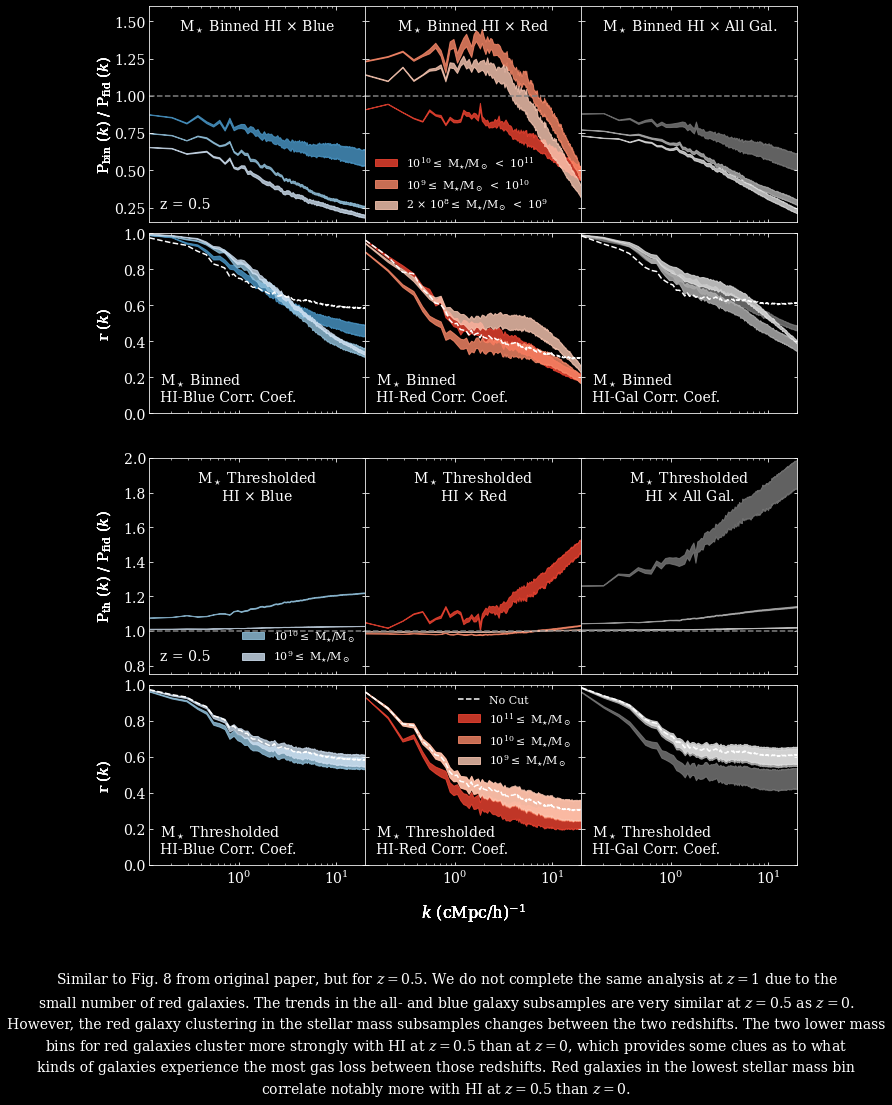

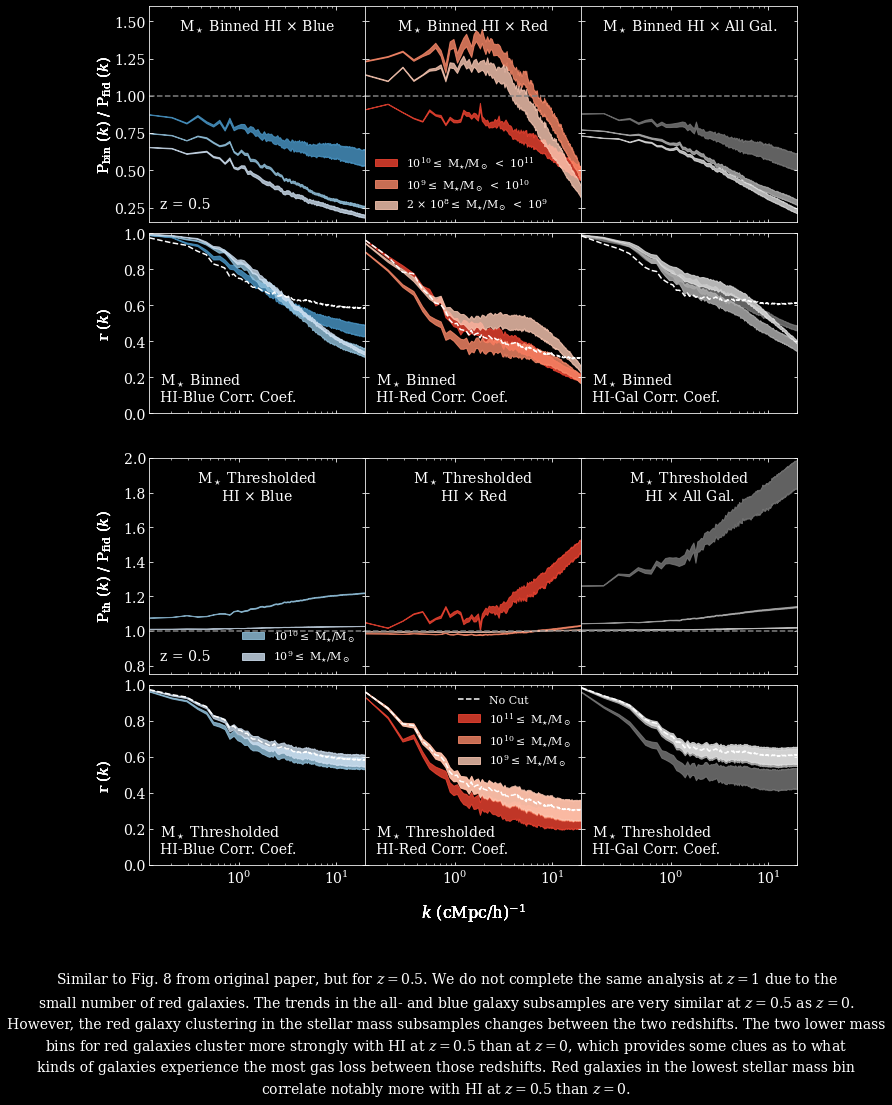

In [30]:
figarr = np.empty((4, 1), dtype = object)
figarr[:, 0] = [afg, bfg, tfg, crfg]
fig = afg.combine(figarr)
fig.set(facecolor = 'black')
fig.savefig(WEBPATH + '67_stmass_binth.png', dpi = 200, facecolor = 'auto', bbox_inches = 'tight')
f = open(WEBPATH + 'stmass_binth.txt', 'r')
text = f.read()
fig.text(0.5, -0.05, text, color = 'white', ha = 'center', va = 'top', fontsize = 14, linespacing = 1.45)
fig.savefig(WEBPATH + '67_stmass_binth_caption.png', dpi = 200, facecolor = 'auto', bbox_inches = 'tight')
fig

# Galaxy Auto Power Stellar Mass Bins

The row values for color: ['blue', 'red', 'resolved']
The column values for snapshot: [99, 67]


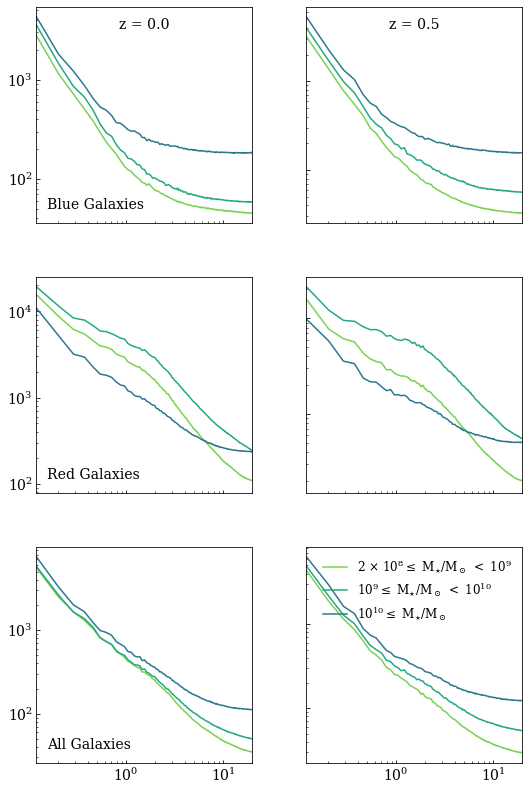

In [3]:
ip = {'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'galbt'], 'gal_res':bins, 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found', 'fieldname':'galaxy'}
fg = ds.figrid('gal_res', 'color', 'snapshot', ip)
fg.rowLabels(['Blue Galaxies', 'Red Galaxies', 'All Galaxies'])
fg.setDefaultTicksParams()
fg.plot()

When binning by stellar mass, the blue and all galaxies exhibit the expected behavior, where the halos with the greater stellar mass will cluster more strongly than lower masses. However, unusually, the lower mass bins in the red galaxies cluster more strongly than the higher mass galaxies.

## Making a Paper figure for Galaxy Auto power spectra

The row values for color: ['blue', 'red', 'resolved']
The column values for : ['no key found']


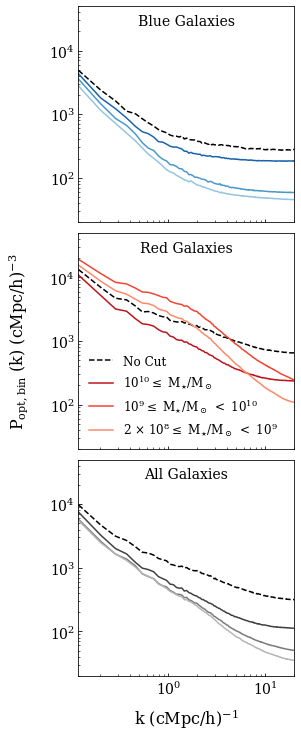

In [4]:

ip = {'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'galbt'], 'gal_res':bins + ['diemer'], 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found', 'fieldname':'galaxy', 'snapshot':99}
fg = ds.figrid('gal_res', 'color', '', ip)
fg.gspecArgs(hspace = 0.05, yborder = [0, 0.25])
fg.rowLabels(['Blue Galaxies', 'Red Galaxies', 'All Galaxies'], pos = [0.5, 0.9])
fg.rowLabelArgs(ha = 'center')
fg.legendArgs(loc = 'lower left', fontsize = 12, slc = (1, 0))
fg.plotOrder(['diemer', 'high-bin', 'mid-bin', 'low-bin'])
fg.setDefaultTicksParams()
fg.axisArgs(ylim = (2e1, 5e4))

gal_res = ip['gal_res'][:3]

cmaps = {}
cmaps['blue'] = seaborn.color_palette('Blues', len(gal_res) + 1)
cmaps['red'] = seaborn.color_palette('Reds', len(gal_res)+ 1)
cmaps['resolved'] = seaborn.color_palette('Greys', len(gal_res) + 1)
for c in ip['color']:
    for b in range(len(gal_res)):
        col = cmaps[c][b+1]
        fg.plotArgs({'color':c, 'gal_res':gal_res[b]}, {'color':col})
fg.plotArgs('diemer', linestyle = '--', color = 'black')
fg.setYLabel(YLAB%r"\mathrm{opt, bin}")
fg.setXLabel(XLAB)
fg.plot()
# fg.save("galaxy_auto_stmass_bins_colorR.png")
# fg.save(DRAFTPATH + "galaxy_auto_stmass_bins_colorR.pdf")

The row values for : ['no key found']
The column values for : ['no key found']


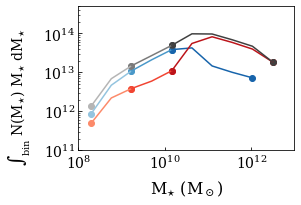

In [6]:
ip = {'is_hist':True, 'fieldname':'galaxy', 'is_hydrogen':False, 'censat':'both'}
def coolplot(ax, data, args):
    new_args = copy.deepcopy(args)
    cmaps['blue'] = seaborn.color_palette('Blues', 4)
    cmaps['red'] = seaborn.color_palette('Reds', 4)
    cmaps['gray'] = seaborn.color_palette('Greys', 4)
    
    cmap = cmaps[args['color']]
    idx = [0, 3, 5, len(data[0])]
    for i in range(3):
        new_args['color'] = cmap[i + 1]
        if i == 0: 
            x = data[0][idx[i]:idx[i+1]]
            y = data[1][idx[i]:idx[i+1]]
        else:
            x = data[0][idx[i]-1:idx[i+1]]
            y = data[1][idx[i]-1:idx[i+1]]

        mask = y > 0
        ax.plot(x[mask], y[mask], **new_args)
        ax.scatter([x[mask][0], x[mask][-1]], [y[mask][0], y[mask][-1]], color = new_args['color'])
    return
    
hgfg = ds.figrid('color', '', '', ip)
hgfg.setPanelsize(3, 2)
hgfg.gspecArgs(yborder = [0.5, 0.33])
hgfg.axisLabelArgs('y', fontsize = 14)
hgfg.setXLabel(r"M$_{\mathrm{\star}}$ (M$_\odot$)")
hgfg.setYLabel(r"$\int_{\mathrm{bin}}$ N(M$_{\rm{\star}}$) M$_{\rm{\star}}$ dM$_{\rm{\star}}$")
hgfg.setFunc({'is_hist':True}, coolplot)
hgfg.axisArgs(xlim = (1e8, 1e13), ylim = (1e11, 5e14))
hgfg.plot()
hgfg.setLegend(visible = False)
# hgfg.save("histogram_galaxies.png")
# hgfg.save(DRAFTPATH + "histogram_galaxies.pdf")

# Galaxy x HI cross-power

The row values for color: ['blue', 'red', 'resolved']
The column values for snapshot: [99, 67]


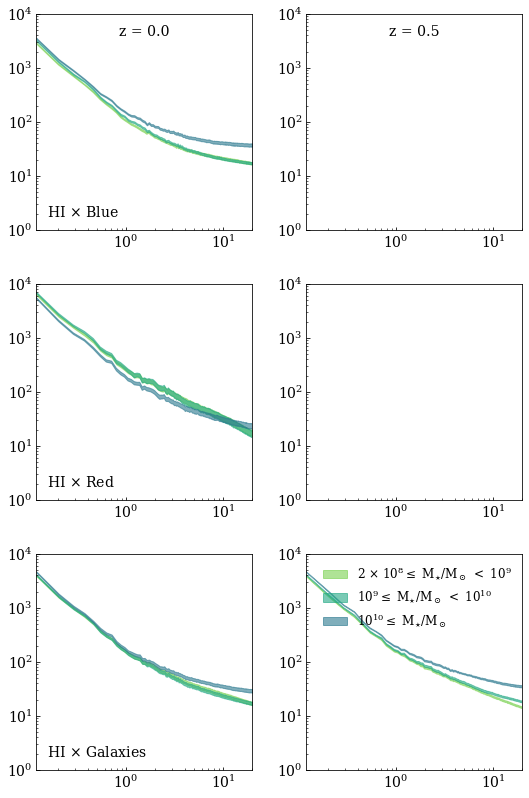

In [14]:
ip = {'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['galbt'], 'gal_res':bins, 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found'}
fg = ds.figrid('gal_res', 'color', 'snapshot', ip)
fg.axisArgs(ylim = (1, 1e4))
fg.autoFill()
fg.plot()

The row values for color: ['blue', 'red', 'resolved']
The column values for snapshot: [99, 67]


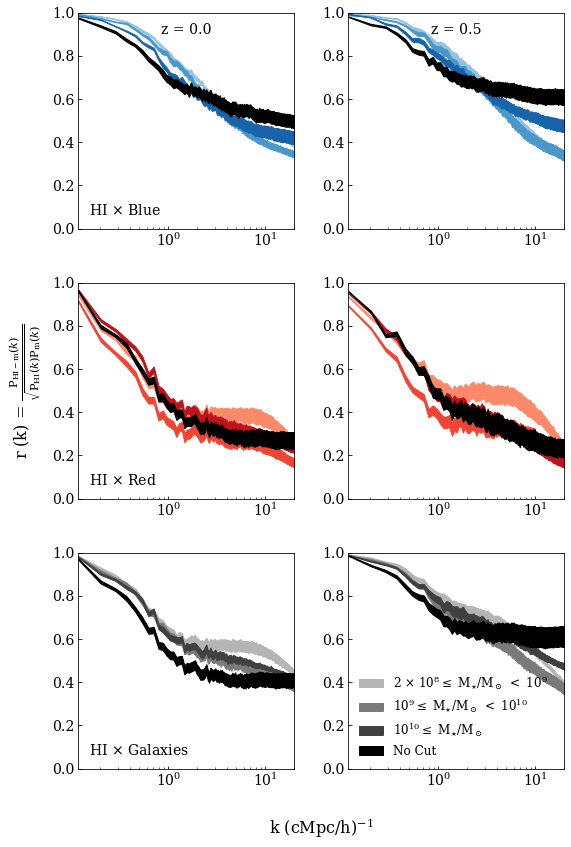

In [18]:
ip = {'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['galbt', 'fiducial'], 'gal_res':bins + ['diemer'], 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'corr_coef', 'HI_fieldname':'hisubhalo'}
fg = ds.figrid('gal_res', 'color', 'snapshot', ip)

gal_res = ip['gal_res'][:3]

cmaps = {}
cmaps['blue'] = seaborn.color_palette('Blues', len(gal_res) + 1)
cmaps['red'] = seaborn.color_palette('Reds', len(gal_res)+ 1)
cmaps['resolved'] = seaborn.color_palette('Greys', len(gal_res) + 1)
for c in ip['color']:
    for b in range(len(gal_res)):
        col = cmaps[c][b+1]
        fg.plotArgs({'color':c, 'gal_res':gal_res[b]}, {'color':col})
        fg.plotArgs('diemer', linestyle = '--', color = 'black')
fg.setYLabel(CORRCOEF)
fg.setXLabel(XLAB)
fg.legendArgs(loc = 'lower left', slc = (-1, -1))
fg.axisArgs(yscale = 'linear', ylim = (0, 1))
fg.autoFill()
fg.plot()

In [14]:
ds.printMatching({'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial'], 'gal_res':bins + ['diemer'], 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'corr_coef', 'HI_fieldname':'hisubhalo'})

{'path': 'fiducial', 'result_runtime': 53.740915060043335, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_GD14_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo', 'post_process': 'corr_coef'}

{'path': 'fiducial', 'result_runtime': 53.715466260910034, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_h

# Centrals/Satellites Galaxy Auto Power

The row values for color: ['blue', 'red', 'resolved']
The column values for gal_res: ['low-bin', 'mid-bin', 'high-bin']


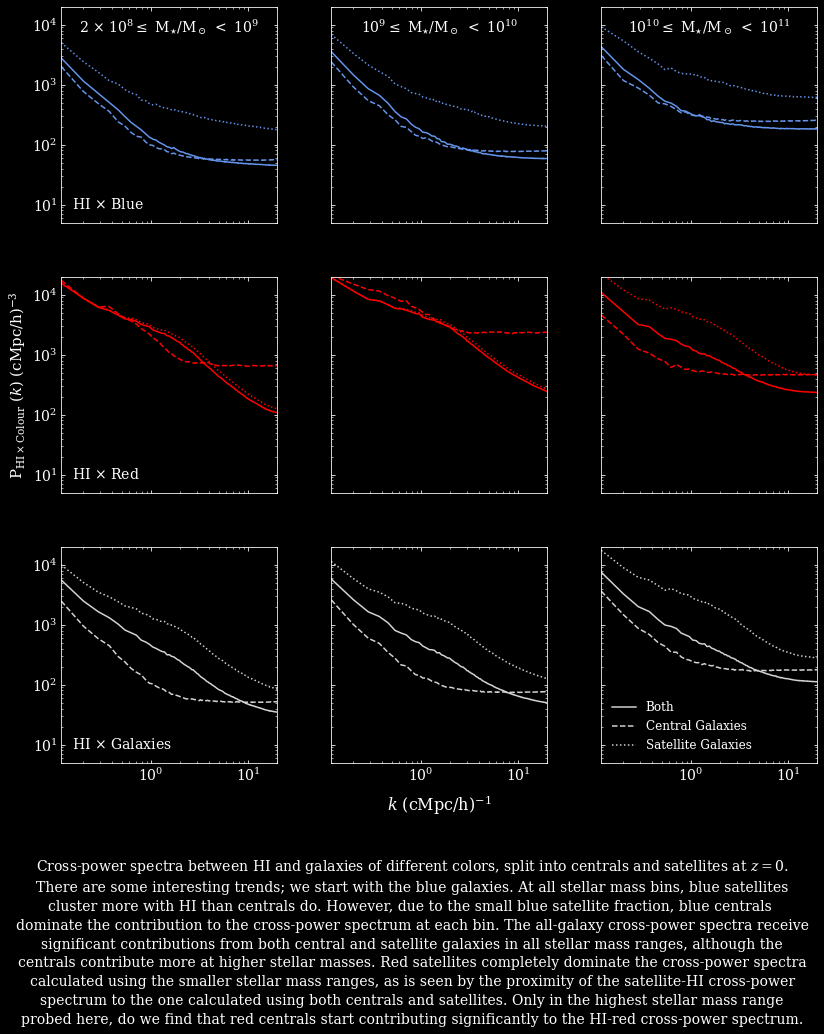

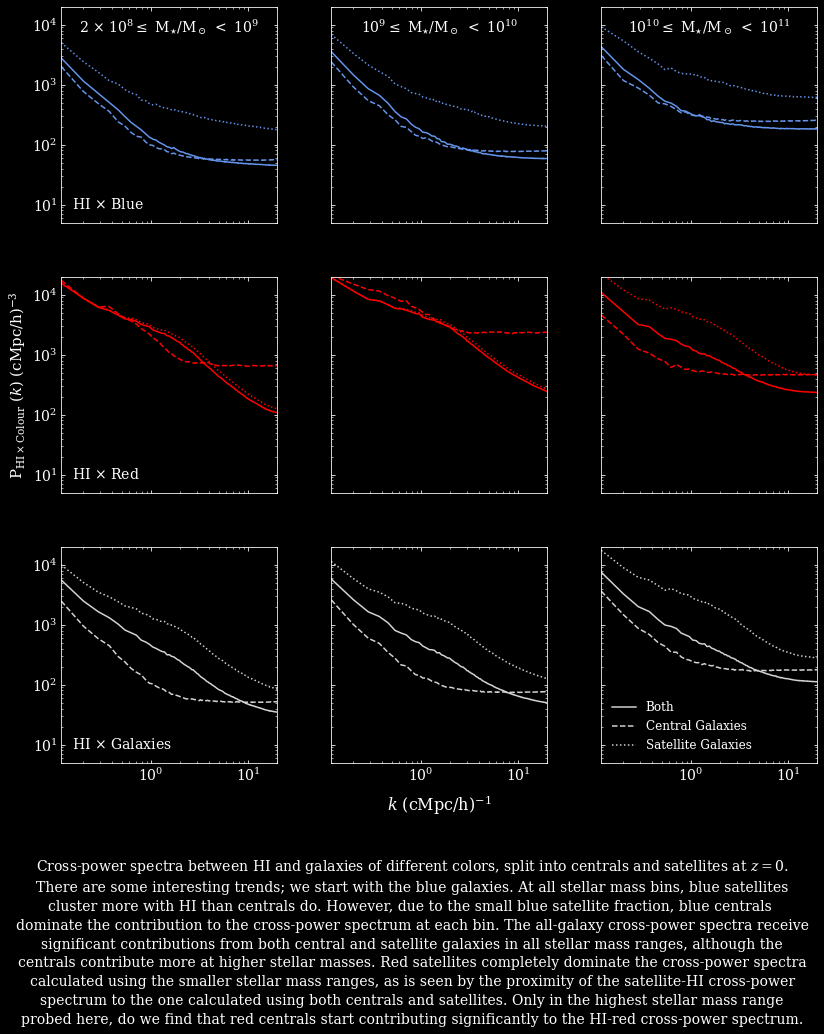

In [38]:
ip = {'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'galbt'], 'gal_res':bins, 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found', 'fieldname':'galaxy'}
ip['censat'] += ['satellites', 'centrals']
ip['snapshot'] = 99
ip['gal_res'] = bins
fg = ds.figrid('censat', 'color', 'gal_res', ip)
fg.plotArgs('satellites', linestyle = 'dotted')
fg.plotArgs('centrals', linestyle = 'dashed')
fg.plotArgs({'color':'blue'}, color = 'cornflowerblue')
fg.plotArgs({'color':'red'}, color = 'red')
fg.plotArgs({'color':'resolved'}, color = 'lightgray')
fg.axisArgs(ylim = (5, 2e4))
fg.setDefaultTicksParams()
fg.legendArgs(loc = 'lower left')
fg.setXLabel(pplib.wnum())
fg.setYLabel(pplib.pklab('\\mathrm{HI} \\times \\mathrm{Colour}', rm = False))
pplib.darkmode(fg)

fg.plot()
fg.save(WEBPATH + 'HIxCol_stbinth_censat.png')
f = open(WEBPATH + 'HIxCol.txt', 'r')
text = f.read()
fg.fig.text(0.5, -0.05, text, color = 'white', ha = 'center', va = 'top', fontsize = 14, linespacing = 1.45)
fg.fig.savefig(WEBPATH + 'HIxCol_caption.png', dpi = 200, facecolor = 'auto', bbox_inches = 'tight')
fg.fig

# Centrals/Satellites in Galaxy x HI cross-power

The row values for color: ['blue', 'red', 'resolved']
The column values for gal_res: ['low-bin', 'mid-bin', 'high-bin']


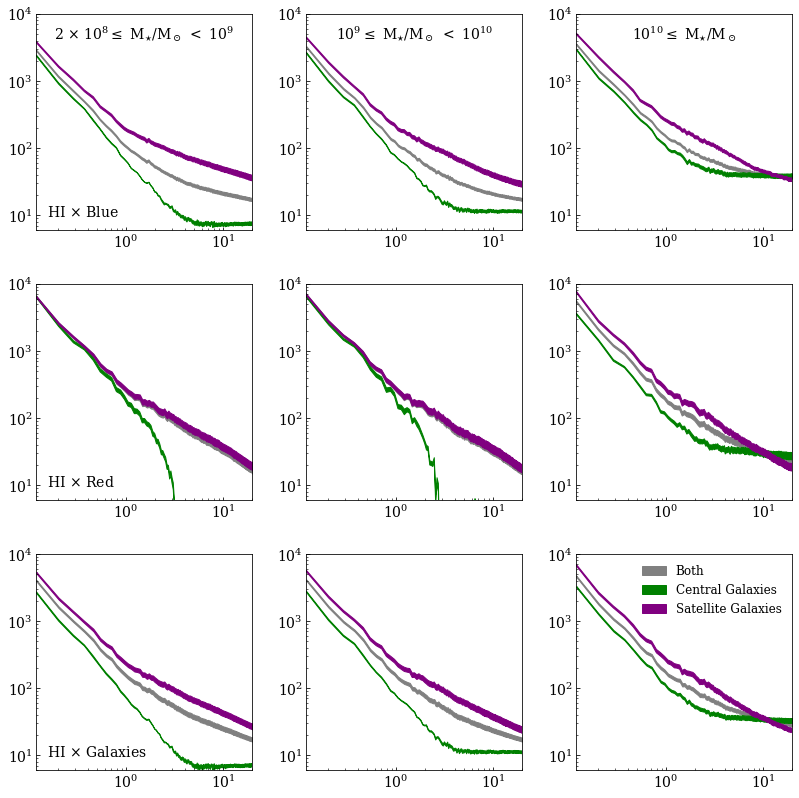

In [10]:
ip = {'is_auto':False, 'censat':['both_satellites', 'both_centrals', 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':'galbt', 'gal_res':bins, 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found', 'snapshot':99, 'HI_fieldname':'hisubhalo'}
fg = ds.figrid('censat', 'color', 'gal_res', ip)
blue_colors = seaborn.color_palette("mako", 3)
fg.plotArgs('both', color = 'gray', label = 'Both')
fg.plotArgs('both_satellites', color = 'purple', label = 'Satellite Galaxies')
fg.plotArgs('both_centrals', color = 'green', label = 'Central Galaxies')
fg.autoFill()
fg.axisArgs(ylim = (6, 1e4))
fg.plot()

The row values for color: ['blue', 'red', 'resolved']
The column values for gal_res: ['low-bin', 'mid-bin', 'high-bin']


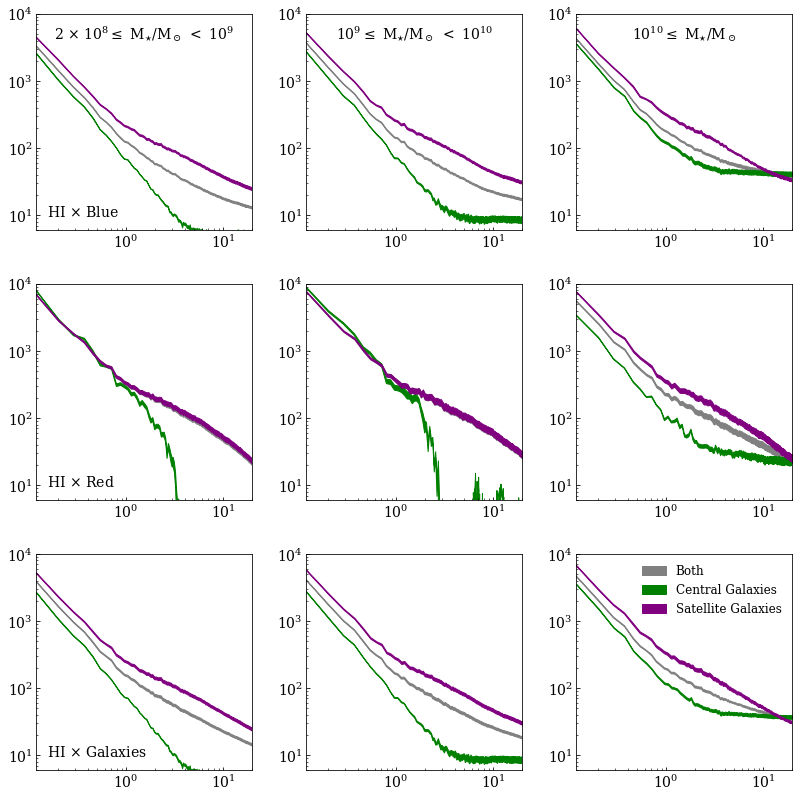

In [19]:
ip = {'is_auto':False, 'censat':['both_satellites', 'both_centrals', 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':'galbt', 'gal_res':bins, 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found', 'snapshot':67, 'HI_fieldname':'hisubhalo'}
fg = ds.figrid('censat', 'color', 'gal_res', ip)
blue_colors = seaborn.color_palette("mako", 3)
fg.plotArgs('both', color = 'gray', label = 'Both')
fg.plotArgs('both_satellites', color = 'purple', label = 'Satellite Galaxies')
fg.plotArgs('both_centrals', color = 'green', label = 'Central Galaxies')
fg.autoFill()
fg.axisArgs(ylim = (6, 1e4))
fg.plot()

# Remaking the stmass bin thresholds figure

In [ ]:
ip = {'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'galbt'], 'gal_res':bins + ['diemer'], 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found', 'fieldname':'galaxy', 'snapshot':99,
     'simname':'tng100'}